In [1]:
import torch
import pyro
import random
from umap import UMAP
import matplotlib.pyplot as plt 
import numpy as np

from pyro.distributions import Categorical
from typing import Any, Union, List, Tuple, Dict


def visualize_rbm(rbm, hidden_loader, level, savefig):
    X_train_bin, y_train = hidden_loader.dataset.tensors
    X_train_bin = X_train_bin.detach().cpu().numpy()
    y_train = y_train.detach().cpu().numpy()
    y_train_input = y_train.reshape(X_train_bin.shape[0], -1) / 10.0 
    X_train_embedded = rbm.transform(X_train_bin, y_train_input)
    umap = UMAP()
    # Fit and transform the data
    X_train_umap = umap.fit_transform(X_train_embedded)
    
    # Plot the results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
    plt.colorbar(scatter, label="Digit Label")
    plt.title("UMAP RBM Embedding of MNIST Training Data of level {}".format(level))
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    # plt.show()
    filename = savefig + "level_" + str(level) + ".png"
    plt.savefig(filename)
    plt.close()
    
def visualize_data(hidden_loader, level, savefig, project=False):
    X_train_bin, y_train = hidden_loader.dataset.tensors
    X_train_embedded = X_train_bin.detach().cpu().numpy()
    y_train = y_train.detach().cpu().numpy()
    y_train_input = y_train.reshape(X_train_bin.shape[0], -1) / 10.0
    if project:
        X_train_embedded = project_points_to_simplex(X_train_embedded)
        
    umap = UMAP(n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,)
    # Fit and transform the data
    X_train_umap = umap.fit_transform(X_train_embedded)
    
    # Plot the results
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
    plt.colorbar(scatter, label="Digit Label")
    plt.title("UMAP RBM Encoding of MNIST Training Data of level {}".format(level))
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.savefig(savefig)
    plt.show()    
    plt.close()

def project_points_to_simplex(points):
    """
    Projects each point in a multidimensional cube [0, 1]^n onto the n-dimensional simplex.

    Parameters:
        points (np.ndarray): A 2D numpy array where each row is a point in the hypercube [0, 1]^n.

    Returns:
        np.ndarray: A 2D numpy array with each row projected onto the n-dimensional simplex.
    """
    # Number of points and dimension
    num_points, dim = points.shape
    
    # Array to store the projected points
    projected_points = np.zeros_like(points)
    
    for i in range(num_points):
        point = points[i]
        
        # Step 1: Sort the point in descending order
        u = np.sort(point)[::-1]
        
        # Step 2: Find the largest k such that the projection condition holds
        cumulative_sum = np.cumsum(u)
        rho = np.where(u > (cumulative_sum - 1) / (np.arange(dim) + 1))[0][-1]
        
        # Step 3: Compute theta
        theta = (cumulative_sum[rho] - 1) / (rho + 1)
        
        # Step 4: Project point onto the simplex
        projected_points[i] = np.maximum(point - theta, 0)
    
    return projected_points

/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


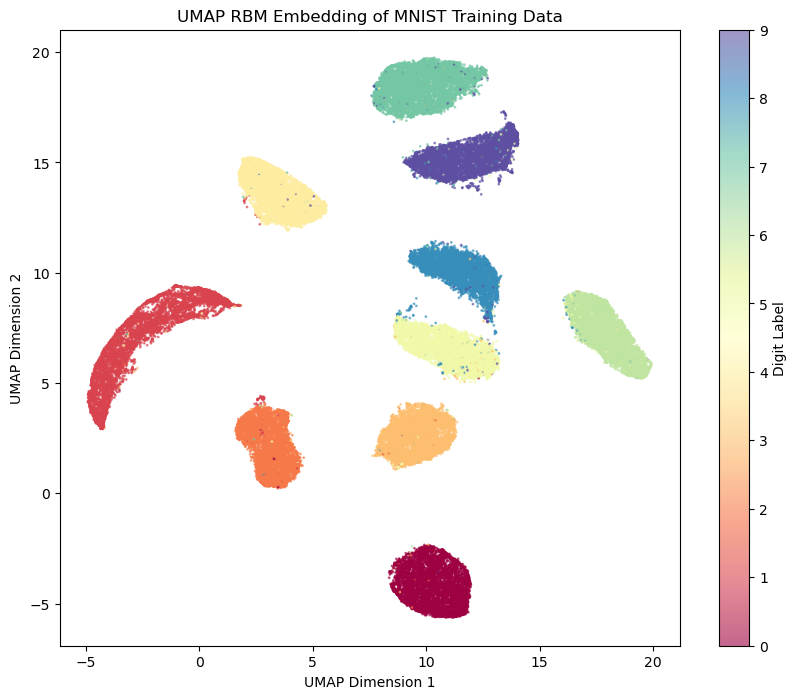

/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


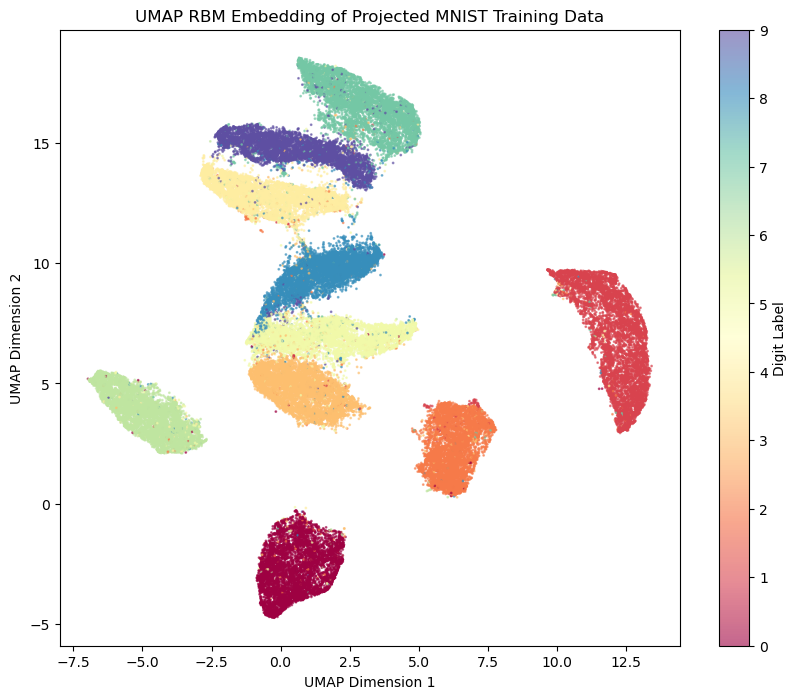

In [54]:
rbm = RBM(n_components=500, learning_rate=0.1, batch_size=1000, n_iter=10, verbose=0, random_state=0, add_bias=False, target_in_model=True, input_dist='bernoulli', latent_dist='bernoulli', target_dist='gaussian')
# # Treat warnings as errors
# warnings.simplefilter("error")

# Fit RBM to the MNIST training data
rbm.fit(X_train_bin, y_train_input)

# Extract embeddings (transform) for train and test sets
X_train_embedded = rbm.transform(X_train_bin, y_train_input)
X_test_embedded = rbm.transform(X_test_bin, y_test_input)
X_train_simplex = project_points_to_simplex(X_train_embedded)
X_test_simplex = project_points_to_simplex(X_test_embedded)

# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,)
warnings.simplefilter("default")
# Fit and transform the data
X_train_umap = umap.fit_transform(X_train_embedded)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP RBM Embedding of MNIST Training Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,)
warnings.simplefilter("default")
# Fit and transform the data
X_train_umap = umap.fit_transform(X_train_simplex)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP RBM Embedding of Projected MNIST Training Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


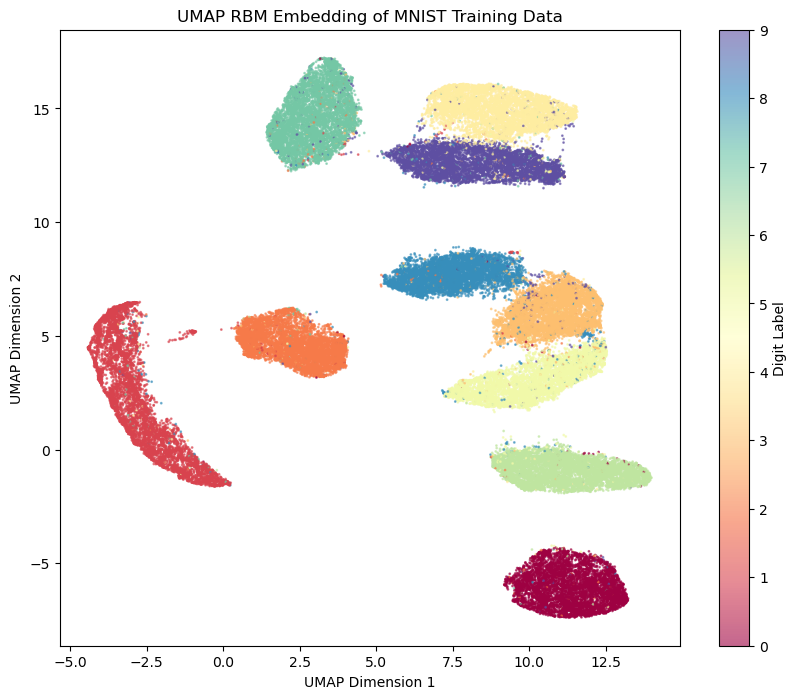

/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


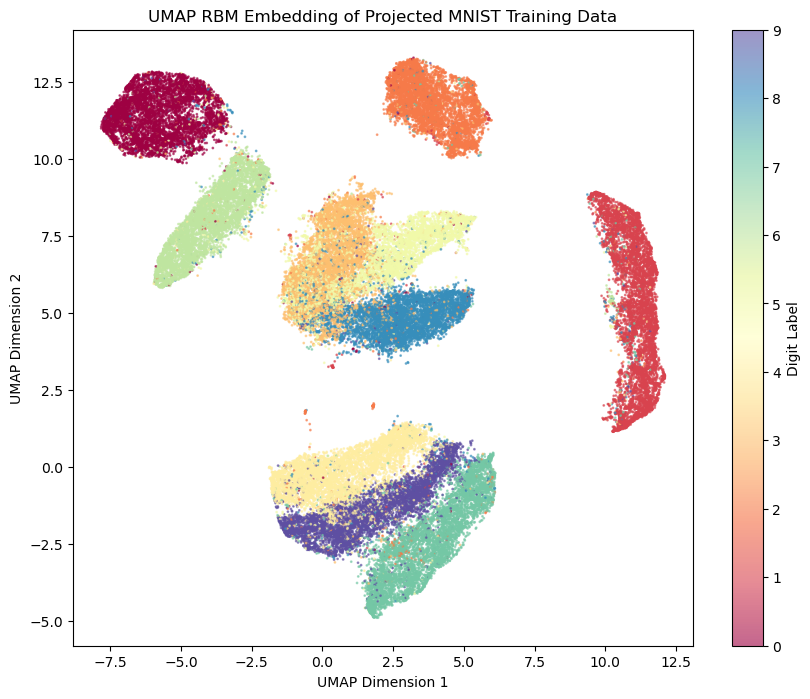

In [55]:
rbm = RBM(n_components=500, learning_rate=0.1, batch_size=1000, n_iter=10, verbose=0, random_state=0, add_bias=False, target_in_model=False, input_dist='bernoulli', latent_dist='bernoulli', target_dist='gaussian')
# # Treat warnings as errors
# warnings.simplefilter("error")

# Fit RBM to the MNIST training data
rbm.fit(X_train_bin, y_train_input)

# Extract embeddings (transform) for train and test sets
X_train_embedded = rbm.transform(X_train_bin, y_train_input)
X_test_embedded = rbm.transform(X_test_bin, y_test_input)
X_train_simplex = project_points_to_simplex(X_train_embedded)
X_test_simplex = project_points_to_simplex(X_test_embedded)

# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,)
warnings.simplefilter("default")
# Fit and transform the data
X_train_umap = umap.fit_transform(X_train_embedded)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP RBM Embedding of MNIST Training Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

# Initialize UMAP with desired parameters
umap = UMAP(n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,)
warnings.simplefilter("default")
# Fit and transform the data
X_train_umap = umap.fit_transform(X_train_simplex)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap="Spectral", s=1, alpha=0.6)
plt.colorbar(scatter, label="Digit Label")
plt.title("UMAP RBM Embedding of Projected MNIST Training Data")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

In [2]:
import torch
import time
from typing import Any, Union, List, Tuple, Dict
from torch.utils.data import DataLoader, TensorDataset
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import os
import numpy as np
from rbm import RBM

from load_dataset import MNIST


class DBN:
    """
    Deep Belief Network
    """
    def __init__(self, input_size: int, layers: list, batch_size: int, epochs: int = 10, savefile: str = None, mode: str = "bernoulli", multinomial_top: bool=False, multinomial_sample_size: int=0, bias: bool = False, k: int = 5, gaussian_top = False, top_sigma: torch.Tensor = None, sigma: torch.Tensor = None, disc_alpha: float = 1.):
        if (torch.cuda.is_available()):
            self.device = torch.device("cuda")
        else:
            self.device = torch.device("cpu")
        # self.device = torch.device("cpu")
        self.input_size = input_size
        self.layers = layers
        self.bias = bias
        self.batch_size = batch_size
        self.layer_parameters = [{"W":None, "hb":None} for _ in range(len(layers))]
        self.visible_bias = None
        self.k = k
        self.mode = mode
        self.gaussian_top = gaussian_top
        if (top_sigma is None):
            self.top_sigma = torch.ones((1,), dtype=torch.float32, device=self.device)/10.0
        else:
            self.top_sigma = top_sigma.to(torch.float32).to(self.device)
        if (sigma is None):
            self.sigma = torch.ones((input_size,), dtype=torch.float32, device=self.device)/10.0
        else:
            self.sigma = sigma.to(torch.float32).to(self.device)
        self.savefile = savefile
        self.epochs = epochs
        self.multinomial_top = multinomial_top
        self.multinomial_sample_size = multinomial_sample_size
        self.depthwise_training_loss = []
        self.top_parameters = {"W":None, "tb":None}
        self.disc_alpha = disc_alpha
        self.rbm = None

    def sample_v(self, layer_index: int, y: torch.Tensor) -> torch.Tensor:
        """
        Sample visible units given hidden units
        """
        W = self.layer_parameters[layer_index]["W"].float()
        if (layer_index == 0):
            vb = self.visible_bias.float()
        else:
            vb = self.layer_parameters[layer_index-1]["hb"].float()
        y = y.float()
        activation = torch.matmul(y, W) + vb

        if (self.mode == "bernoulli"):
            p_v_given_h = torch.sigmoid(activation)
            variable = torch.bernoulli(p_v_given_h)
        elif (self.mode == "gaussian"):
            gaussian_dist = torch.distributions.normal.Normal(activation, self.sigma)
            variable = gaussian_dist.sample()
            # Do not need p_v_given_h, otherwise it will not be correct
            p_v_given_h = torch.exp(gaussian_dist.log_prob(variable))
        else:
            raise ValueError("Invalid mode")
        return p_v_given_h, variable
    
    def sample_h(self, layer_index: int, x_bottom: torch.Tensor, label: torch.Tensor, top_down_sample: bool=False) -> torch.Tensor:
        """
        Sample hidden units given visible units
        """
        W_bottom = self.layer_parameters[layer_index]["W"].float()
        bias = self.layer_parameters[layer_index]["hb"].float()
        x_bottom = x_bottom.float()
        label = label.float()
        if (layer_index == 0):
            activation = torch.matmul(x_bottom/(self.sigma**2), W_bottom.t()) + bias
        else:    
            activation =torch.matmul(x_bottom, W_bottom.t()) + bias 

        if (layer_index == len(self.layers)-1 and self.multinomial_top):
            if (top_down_sample):
                activation = activation + torch.matmul(label/(self.top_sigma**2), self.top_parameters["W"])
            p_h_given_v = torch.softmax(activation, dim=1)
            indices = torch.multinomial(p_h_given_v, self.multinomial_sample_size, replacement=True)
            one_hot = torch.zeros(p_h_given_v.size(0), self.multinomial_sample_size, p_h_given_v.size(1), device=self.device).scatter_(2, indices.unsqueeze(-1), 1)
            variable = torch.sum(one_hot, dim=1)
        else:
            p_h_given_v = torch.sigmoid(activation)
            variable = torch.bernoulli(p_h_given_v)
        return p_h_given_v, variable
    
    def sample_r(self, x_bottom: torch.Tensor) -> torch.Tensor:
        """
        Sample reconstruction
        """
        x_bottom = x_bottom.float()
        if (self.gaussian_top):
            mean = torch.mm(x_bottom/(self.top_sigma**2), self.top_parameters["W"].t()) + self.top_parameters["tb"]
            gaussian_dist = torch.distributions.normal.Normal(mean, self.top_sigma)
            variable = gaussian_dist.sample()
            p_r_given_h = torch.exp(gaussian_dist.log_prob(variable))
        else:
            p_r_given_h = torch.ones((self.batch_size, 1), dtype=torch.float32, device=self.device)
            variable = torch.ones((self.batch_size, 1), dtype=torch.float32, device=self.device)
        return p_r_given_h, variable
        
    def generate_input_for_layer(self, index: int, dataloader: DataLoader) -> DataLoader:
        """
        Generate input for layer
        """
        input_layer = []
        input_labels = []
        if (index == 0):
            return dataloader
        else:
            for batch, label in dataloader:
                _, x_dash = self.generate_input_dataset_for_layer(index, batch, label)
                input_layer.append(x_dash)
                input_labels.append(label)
            input_data = torch.cat(input_layer, dim=0)
            input_labels = torch.cat(input_labels, dim=0)
            dataset = TensorDataset(input_data, input_labels)
            hidden_loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
            return hidden_loader

    def generate_input_dataset_for_layer(self, index: int, dataset: torch.Tensor, label: torch.Tensor) -> torch.Tensor:
        """
        Generate input for layer
        """
        if (index == 0):
            return None, dataset
        else:
            x_gen = []
            for _ in range(self.k):
                x_dash = dataset.to(self.device)
                label = label.unsqueeze(1).to(torch.float32).to(self.device)
                for i in range(index):  
                    p_x, x_dash = self.sample_h(i, x_dash, label)
                x_gen.append(p_x)
            x_dash = torch.stack(x_gen)
            x_dash = torch.mean(x_dash, dim=0)
            x_binary = torch.bernoulli(x_dash)
            return x_dash, x_binary.to(torch.float32).to(self.device)
    
    def train(self, dataloader: DataLoader, savefig: str = None):
        """
        Train DBN
        """
        for index, _ in enumerate(self.layers):
            start_time = time.time()
            if (index == 0):
                vn = self.input_size
            else:
                vn = self.layers[index-1]
            hn = self.layers[index]
            mode = self.mode
            if (index == len(self.layers)-1):
                if (self.multinomial_top):
                    mode = "multinomial"
            rbm = RBM(n_components=hn, learning_rate=0.1, batch_size=self.batch_size, n_iter=self.epochs, verbose=0, add_bias=self.bias, target_in_model=self.gaussian_top, hybrid=False, input_dist=self.mode, latent_dist=mode, target_dist='gaussian')
            hidden_loader = self.generate_input_for_layer(index, dataloader)

            rbm.fit_dataloader(hidden_loader, vn, 1, self.multinomial_sample_size, self.disc_alpha)
            self.rbm = rbm
            self.layer_parameters[index]["W"] = torch.tensor(rbm.components_, device=self.device, dtype=torch.float32)
            self.layer_parameters[index]["hb"] = torch.tensor(rbm.intercept_hidden_, device=self.device, dtype=torch.float32)
            if (index == 0):
                self.visible_bias = torch.tensor(rbm.intercept_visible_, device=self.device, dtype=torch.float32)
            else:
                self.layer_parameters[index-1]["hb"] = torch.tensor(rbm.intercept_visible_, device=self.device, dtype=torch.float32)
            self.top_parameters["W"] = torch.tensor(rbm.target_components_, device=self.device, dtype=torch.float32)
            self.top_parameters["tb"] = torch.tensor(rbm.intercept_target_, device=self.device, dtype=torch.float32)

            print("Finished Training Layer", index, "to", index+1)
            training_loss = self.calc_training_loss(dataloader, index+1)
            print("Training Loss of DBN with {} layers:".format(index+1), training_loss)
            self.depthwise_training_loss.append(training_loss)
            end_time = time.time()
            print("Time taken for training DBN layer", index, "to", index+1, "is", end_time-start_time, "seconds")
            visualize_rbm(rbm, hidden_loader, index, savefig)

            # encoded = self.encode(dataloader, index+1)
            # visualize_data(encoded, index+1)
            
        if (self.savefile is not None):
            model = self.initialize_nn_model()
            nn_savefile = self.savefile.replace(".pth", "_nn.pth")
            torch.save(model, nn_savefile)
            self.save_model()
        
        self.visualize_training_curve()

    def visualize_training_curve(self):
        """
        Visualize training curve
        """
        directory = "../results/plots/DBN/"
        if not os.path.exists(directory):
            os.makedirs(directory)
        plt_title = "Training Loss for increasing depth of DBN"
        x = np.arange(1, len(self.depthwise_training_loss)+1)
        plt.plot(x, np.array(self.depthwise_training_loss))
        plt.xlabel("Depth")
        plt.ylabel("Training Loss")
        plt.title(plt_title)
        plt.savefig(directory + plt_title.replace(" ", "_") + ".png")
        plt.close()
        
    def calc_training_loss(self, dataloader: DataLoader, depth: int):
        '''
        '''
        train_loss = torch.tensor([0.], device=self.device)
        for batch_data, label in dataloader:
            v_original = batch_data.to(self.device)
            label = label.unsqueeze(1).to(torch.float32).to(self.device)
            v_reconstruct, _ = self.reconstructor(v_original, label, depth)
            train_loss += torch.mean(torch.abs(v_original - v_reconstruct))
        return train_loss.item()

    def reconstructor(self, x: torch.Tensor, y: torch.Tensor, depth: int = -1) -> torch.Tensor:
        """
        Reconstruct input
        """
        if (depth == -1):
            depth = len(self.layers)
        x_gen = []
        for _ in range(self.k):
            x_dash = x.clone()
            for i in range(depth):
                if (i == len(self.layers)-1 and self.gaussian_top):
                    top_down_sample = True
                    p_x, x_dash = self.sample_h(i, x_dash, y, top_down_sample)
                else:
                    p_x, x_dash = self.sample_h(i, x_dash, y)
            x_gen.append(p_x)
        x_dash = torch.stack(x_gen)
        x_dash = torch.mean(x_dash, dim=0)


        y_gen = []
        for _ in range(self.k):
            y_dash = torch.bernoulli(x_dash)
            for i in range(depth-1, -1, -1):
                p_y, y_dash = self.sample_v(i, y_dash)
            y_gen.append(p_y)
        y_dash = torch.stack(y_gen)
        y_dash = torch.mean(y_dash, dim=0)
        y_dash = torch.bernoulli(y_dash)

        return y_dash, x_dash

    def reconstruct(self, dataloader: DataLoader, depth: int = -1) -> DataLoader:
        """
        Reconstruct input
        """
        visible_data = []
        latent_vars = []
        data_labels = []
        for batch, label in dataloader:
            batch = batch.to(self.device)
            label = label.unsqueeze(1).to(torch.float32).to(self.device)
            visible, latent = self.reconstructor(batch, label, depth)
            visible_data.append(visible)
            latent_vars.append(latent)
            data_labels.append(label)
        visible_data = torch.cat(visible_data, dim=0)
        latent_vars = torch.cat(latent_vars, dim=0)
        data_labels = torch.cat(data_labels, dim=0)
        dataset = TensorDataset(visible_data, latent_vars, data_labels)
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
    
    def encoder(self, dataset: torch.Tensor, label: torch.Tensor, depth: int) -> torch.Tensor:
        """
        Generate top level latent variables
        """
        dataset = dataset.to(self.device)
        _, x_bottom = self.generate_input_dataset_for_layer(depth-1, dataset, label)
        W_bottom = self.layer_parameters[depth-1]["W"].to(self.device)
        b_bottom = self.layer_parameters[depth-1]["hb"].to(self.device)
        activation = torch.matmul(x_bottom, W_bottom.t()) + b_bottom 
        if (depth == len(self.layers)):
            activation = activation + torch.matmul(label/(self.top_sigma**2), self.top_parameters["W"].to(self.device)) + self.top_parameters["tb"].to(self.device)
        if (self.multinomial_top):
            p_h_given_v = torch.softmax(activation, dim=1)      
        else:
            p_h_given_v = torch.sigmoid(activation)
        return p_h_given_v

    def encode(self, dataloader: DataLoader,  depth: int = -1) -> DataLoader:
        """
        Encode data
        """
        if (depth == -1):
            depth = len(self.layers)
        latent_vars = []
        labels = []
        for data, label in dataloader:
            data = data.to(self.device)
            label = label.unsqueeze(1).to(torch.float32).to(self.device)
            latent_vars.append(self.encoder(data, label, depth))
            labels.append(label)
        latent_vars = torch.cat(latent_vars, dim=0)
        labels = torch.cat(labels, dim=0)
        latent_dataset = TensorDataset(latent_vars, labels)

        return DataLoader(latent_dataset, batch_size=self.batch_size, shuffle=False)
    
    def load_model(self, savefile: str):
        """
        Load DBN or DBM model
        """
        model = torch.load(savefile, weights_only=False)
        layer_parameters = []
        for index in range(len(model["W"])):
            layer_parameters.append({"W":model["W"][index].to(self.device), "hb":model["hb"][index].to(self.device)})
            visible_bias = model["vb"]
        
        top_parameters = {"W":model["TW"].to(self.device), "tb":model["tb"].to(self.device)}
        self.layer_parameters = layer_parameters
        self.top_parameters = top_parameters
        self.visible_bias = visible_bias

    def load_nn_model(self, savefile: str):
        """
        Load nn model
        """
        dbn_model = torch.load(savefile, weights_only=False)
        for layer_no, layer in enumerate(dbn_model):
            # if (layer_no//2 == len(self.layer_parameters)-1):
            #     break
            if (layer_no%2 == 0):
                self.layer_parameters[layer_no//2]["W"] = layer.weight.to(self.device)
                if (self.bias):
                    if (layer_no == 0):
                        self.visible_bias = layer.bias.to(self.device)
                    else:
                        self.layer_parameters[layer_no//2-1]["hb"] = layer.bias.to(self.device)
                print("Loaded Layer", layer_no//2)
        for index, layer in enumerate(self.layer_parameters):
            if (index < len(self.layer_parameters)-1):
                self.layer_parameters[index]["hb"] = self.layer_parameters[index+1]["vb"]

    def save_model(self, savefile: str = None):
        """
        Save model
        """
        if (savefile is None):
            savefile = self.savefile
        model = {"W": [], "vb": None, "hb": [], "TW": None , "tb": None}
        for layer in self.layer_parameters:
            model["W"].append(layer["W"])
            model["hb"].append(layer["hb"])
        model["TW"] = self.top_parameters["W"]
        model["tb"] = self.top_parameters["tb"]
        model["vb"] = self.visible_bias
        torch.save(model, savefile)

    def initialize_nn_model(self):
        """
        Initialize model
        """
        print("The last layer will not be activated. The rest are activated using the Sigmoid function.")

        modules = []
        for index, layer in enumerate(self.layer_parameters):
            modules.append(torch.nn.Linear(layer["W"].shape[1], layer["W"].shape[0]))
            if (index < len(self.layer_parameters)-1):
                modules.append(torch.nn.Sigmoid())
        model = torch.nn.Sequential(*modules)
        model = model.to(self.device)

        for layer_no, layer in enumerate(model):
            if (layer_no//2 == len(self.layer_parameters)-1):
                break
            if (layer_no%2 == 0):
                model[layer_no].weight = torch.nn.Parameter(self.layer_parameters[layer_no//2]["W"])
        return model

In [3]:
mnist = MNIST()
train_x, train_y, test_x, test_y = mnist.load_dataset()
train_x = train_x.float()
train_y = train_y.float()/10.
test_x = test_x.float()
test_y = test_y.float()/10.
print('MAE for all 0 selection:', torch.mean(train_x))
batch_size = 1000	
datasize = train_x.shape[0]
data_dimension = train_x.shape[1]

print("The whole dataset has {} data. The dimension of each data is {}. Batch size is {}.".format(datasize, data_dimension, batch_size))

# train_x = train_x[:3*batch_size]
# train_y = train_y[:3*batch_size]

dataset = TensorDataset(train_x, train_y)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

MAE for all 0 selection: tensor(0.1323)
The whole dataset has 60000 data. The dimension of each data is 784. Batch size is 1000.


Finished Training Layer 0 to 1
Training Loss of DBN with 1 layers: 8.00120735168457
Time taken for training DBN layer 0 to 1 is 30.936020612716675 seconds
The last layer will not be activated. The rest are activated using the Sigmoid function.


/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/matplotlib/cbook.py:1762: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


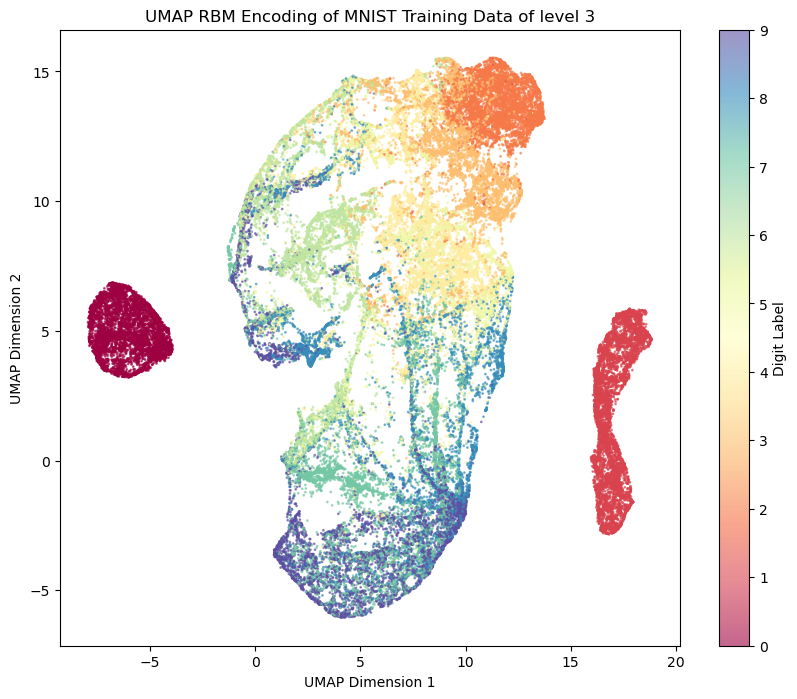

Finished dbn with latent dimension 500 Experiment


In [49]:
directory = "../results/plots/DBN/debug/UMAP_bernoulli_label/"
latent_dim = 500
filename = "dbn_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500], batch_size=batch_size, epochs = 10, savefile=filename, mode = "bernoulli", multinomial_top = False, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))

Finished Training Layer 0 to 1
Training Loss of DBN with 1 layers: 4.541173458099365
Time taken for training DBN layer 0 to 1 is 151.31735515594482 seconds
The last layer will not be activated. The rest are activated using the Sigmoid function.


/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/matplotlib/cbook.py:1762: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


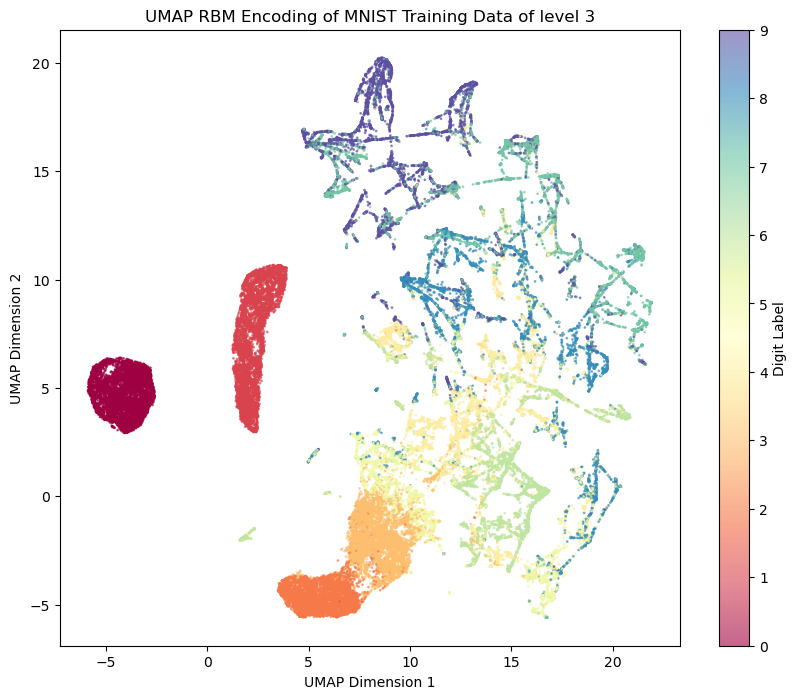

Finished dbn with latent dimension 500 Experiment


In [56]:
directory = "../results/plots/DBN/debug/UMAP_bernoulli/"
latent_dim = 500
filename = "dbn_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500], batch_size=batch_size, epochs = 50, savefile=filename, mode = "bernoulli", multinomial_top = False, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))

Finished Training Layer 0 to 1
Training Loss of DBN with 1 layers: 2.973450183868408
Time taken for training DBN layer 0 to 1 is 612.9024636745453 seconds
The last layer will not be activated. The rest are activated using the Sigmoid function.


/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/matplotlib/cbook.py:1762: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


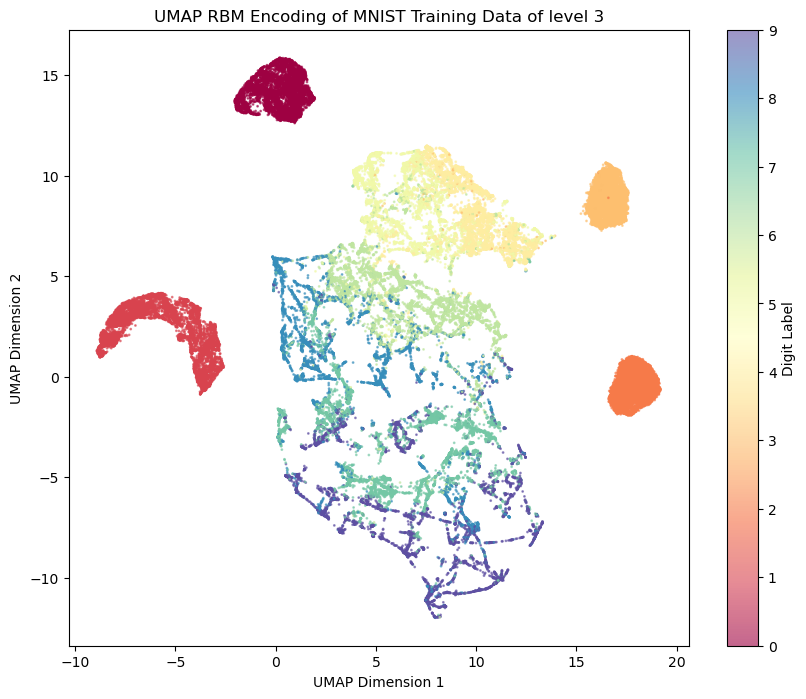

Finished dbn with latent dimension 500 Experiment


In [57]:
directory = "../results/plots/DBN/debug/UMAP_bernoulli/"
latent_dim = 500
filename = "dbn_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500], batch_size=batch_size, epochs = 200, savefile=filename, mode = "bernoulli", multinomial_top = False, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))

Finished Training Layer 0 to 1
Training Loss of DBN with 1 layers: 2.701059103012085
Time taken for training DBN layer 0 to 1 is 877.4143726825714 seconds
The last layer will not be activated. The rest are activated using the Sigmoid function.


/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/matplotlib/cbook.py:1762: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


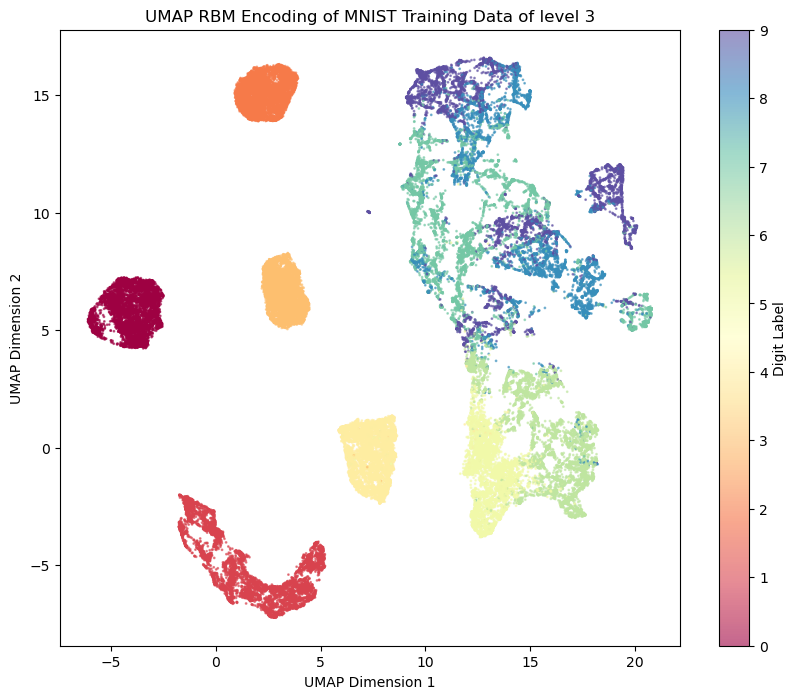

Finished dbn with latent dimension 500 Experiment


In [58]:
directory = "../results/plots/DBN/debug/UMAP_bernoulli/"
latent_dim = 500
filename = "dbn_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500], batch_size=batch_size, epochs = 300, savefile=filename, mode = "bernoulli", multinomial_top = False, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
dbn.load_model(filename)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))

Finished Training Layer 0 to 1
Training Loss of DBN with 1 layers: 2.417903184890747
Time taken for training DBN layer 0 to 1 is 1616.3609609603882 seconds
The last layer will not be activated. The rest are activated using the Sigmoid function.


/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/matplotlib/cbook.py:1762: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


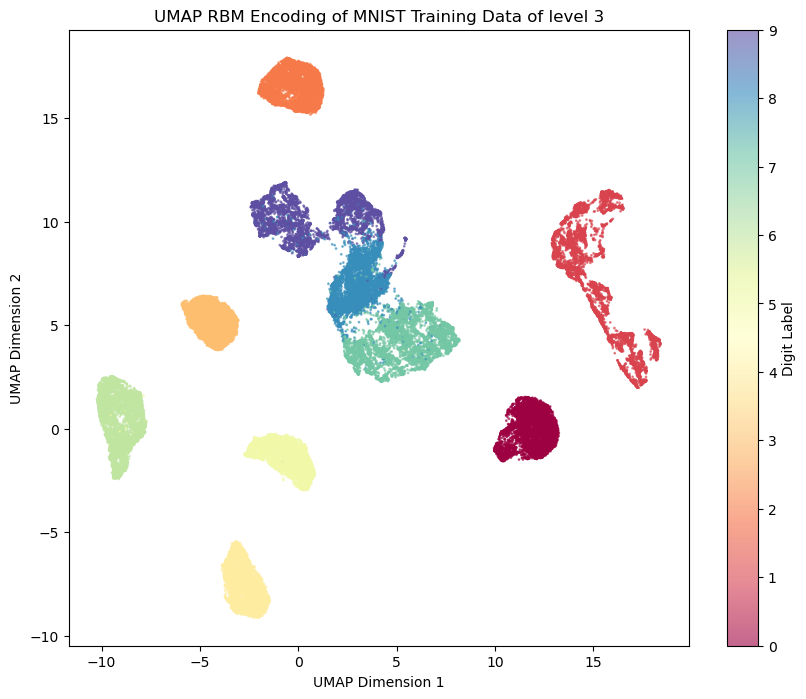

Finished dbn with latent dimension 500 Experiment


In [59]:
directory = "../results/plots/DBN/debug/UMAP_bernoulli/"
latent_dim = 500
filename = "dbn_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500], batch_size=batch_size, epochs = 500, savefile=filename, mode = "bernoulli", multinomial_top = False, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
dbn.load_model(filename)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))

Finished Training Layer 0 to 1
Training Loss of DBN with 1 layers: 2.2767279148101807
Time taken for training DBN layer 0 to 1 is 3105.1842515468597 seconds
The last layer will not be activated. The rest are activated using the Sigmoid function.


/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/matplotlib/cbook.py:1762: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)


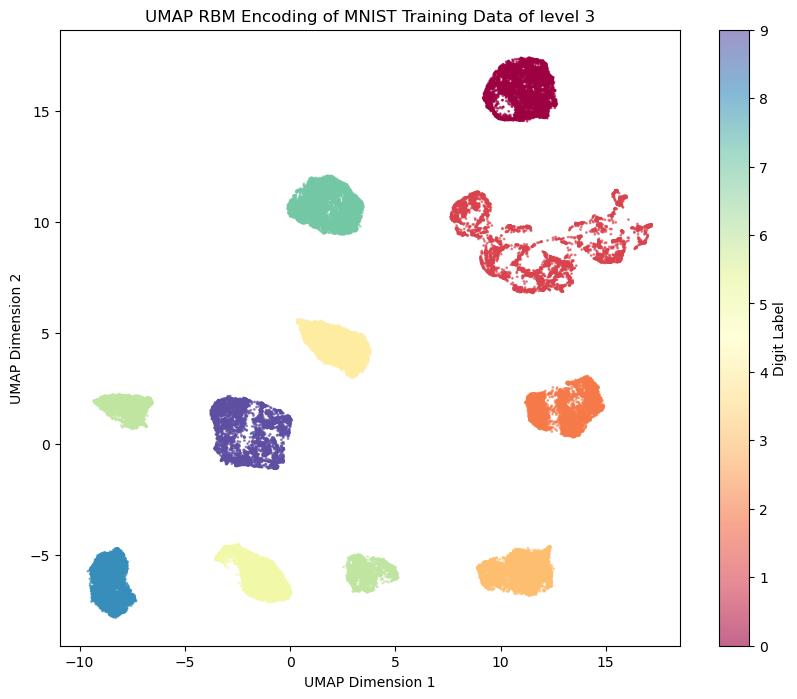

Finished dbn with latent dimension 500 Experiment


In [60]:
directory = "../results/plots/DBN/debug/UMAP_bernoulli/"
latent_dim = 500
filename = "dbn_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500], batch_size=batch_size, epochs = 1000, savefile=filename, mode = "bernoulli", multinomial_top = False, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
dbn.load_model(filename)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))

In [4]:
directory = "../results/plots/DBN/debug/UMAP_multinomial_label/"
latent_dim = 500
filename = "dbn_multinomial_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500], batch_size=batch_size, epochs = 100, savefile=filename, mode = "bernoulli", multinomial_top = True, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
# dbn.load_model(filename)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))

ValueError: sum(pvals[:-1].astype(np.float64)) > 1.0. The pvals array is cast to 64-bit floating point prior to checking the sum. Precision changes when casting may cause problems even if the sum of the original pvals is valid.

Finished Training Layer 0 to 1
Training Loss of DBN with 1 layers: 7.9050140380859375
Time taken for training DBN layer 0 to 1 is 2889.6292130947113 seconds
Finished Training Layer 1 to 2
Training Loss of DBN with 2 layers: 7.917448997497559
Time taken for training DBN layer 1 to 2 is 1630.8624060153961 seconds
Finished Training Layer 2 to 3
Training Loss of DBN with 3 layers: 7.933520317077637
Time taken for training DBN layer 2 to 3 is 1491.7605891227722 seconds
The last layer will not be activated. The rest are activated using the Sigmoid function.


/home/leo/miniforge3/envs/hdp/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


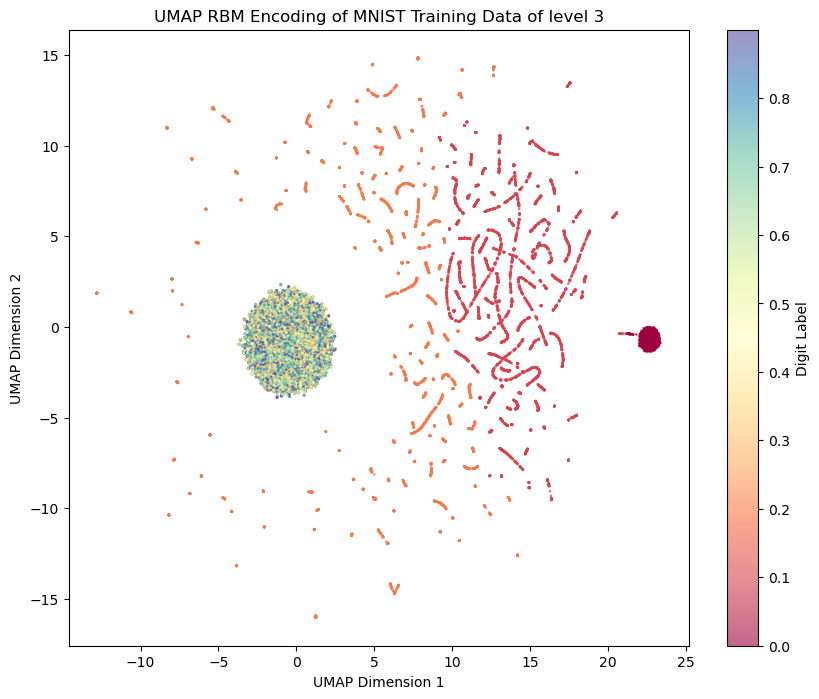

Finished dbn with latent dimension 300 Experiment


In [9]:
directory = "../results/plots/DBN/debug/UMAP_multinomial_label/"
latent_dim = 300
filename = "dbn_multinomial_" + str(latent_dim) + ".pth"
if not os.path.exists(directory):
    os.makedirs(directory)
dbn = DBN(data_dimension, layers=[500, 300, 100], batch_size=batch_size, epochs = 1000, savefile=filename, mode = "bernoulli", multinomial_top = True, multinomial_sample_size = 10, bias = False, k = 50, gaussian_top = True, top_sigma = 0.1*torch.ones((1,)), sigma = None, disc_alpha = 1.)
dbn.load_model(filename)
dbn.train(data_loader, directory)

latent_loader = dbn.encode(data_loader)
new_dir = directory + "final_latent_embedding.png"
visualize_data(latent_loader, 3, new_dir, project=False)
print("Finished dbn with latent dimension {} Experiment".format(latent_dim))